**Table of Contents**
<div id="toc"></div>

# Importing DF

In [1]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as LR
from scipy.constants import physical_constants as phy
import random
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit, Model
import statsmodels.api as ap
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns
sns.set(color_codes = True)
np.random.seed(1974)
ev = phy["joule-electron volt relationship"]
bolts = phy["Boltzmann constant in eV/K"]
k = bolts[0]
# Let printing work the same in Python 2 and 3
from __future__ import print_function
random.seed(1)

/home/abi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df1 = pd.read_csv('../Data/snail_respiration_BK.csv', sep =',')

df1["stream_temp"] = df1["stream_temp"].astype(str)

new_df = df1[["stream", "stream_temp", "exp_temp", "mass","resp"]]
df1


,trial,system,date_time,year,species,stream,stream_temp,exp_temp,chamber,mass,resp,start_status,end_status,comm_1,comm_2,comm_3,confidence_id,outlier,remove
0,73,old,7.6_1300,2016,Radix balthica,11,5.6,5,3,3.014683,0.010438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74,old,7.6_1400,2016,Radix balthica,11,5.6,5,3,3.014683,0.016002,NaN,NaN,"repeat of trial: 5 acute 7.6_1300_old, with re...",NaN,NaN,NaN,NaN,NaN
2,73,old,7.6_1300,2016,Radix balthica,11,5.6,5,4,11.716683,0.039203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74,old,7.6_1400,2016,Radix balthica,11,5.6,5,4,11.716683,0.042461,NaN,NaN,"repeat of trial: 5 acute 7.6_1300_old, with re...",NaN,NaN,NaN,NaN,NaN
4,73,old,7.6_1300,2016,Radix balthica,11,5.6,5,5,13.338753,0.042687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,74,old,7.6_1400,2016,Radix balthica,11,5.6,5,5,13.338753,0.076883,NaN,NaN,"repeat of trial: 5 acute 7.6_1300_old, with re...",NaN,NaN,NaN,NaN,NaN
6,24,old,6.25_1730,2016,Radix balthica,11,5.6,5,2,23.529307,0.366810,NaN,NaN,reg. chamber - R2=0.888; gave this to Maureen ...,NaN,NaN,NaN,NaN,NaN
7,105,old,7.8_1400,2016,Radix balthica,11,5.6,10,5,16.986706,0.198874,NaN,NaN,used short fat chambers,NaN,NaN,NaN,NaN,NaN
8,105,old,7.8_1400,2016,Radix balthica,11,5.6,10,4,21.959874,0.143871,NaN,NaN,used short fat chambers,NaN,NaN,NaN,NaN,NaN
9,105,old,7.8_1400,2016,Radix balthica,11,5.6,10,2,29.566405,0.227699,NaN,NaN,used short fat chambers. Body size measurement...,NaN,NaN,NaN,NaN,NaN


# Adding new columns to df

In [3]:
###### y = t - t0/ k t t0   t0 normally mean of t approx
workingdf = new_df.assign(Exp_Temp_K = new_df["exp_temp"] + 273.15)
workingdf = workingdf.assign(log_resp = lambda x: np.log((x.resp)))
workingdf = workingdf.assign(mass_g = lambda x: x["mass"]/1000)
workingdf = workingdf.assign(x1 = lambda x: ((x["Exp_Temp_K"] - 290.65)/(k*x["Exp_Temp_K"]*290.65)))
workingdf = workingdf.assign(x2 = lambda x: (1/(k * x["Exp_Temp_K"]) ))
workingdf = workingdf.assign(log_mass_resp = lambda x: np.log(x["resp"] * (x["mass"]**(-3./4))))
workingdf = workingdf.assign(lnmass = lambda x: np.log(x["mass"]))
workingdf = workingdf.assign(mass_resp = lambda x: x["resp"] * (x["mass"]**(-3./4)))
workingdf = workingdf.dropna()
new_df = workingdf
workingdf = workingdf[(workingdf["exp_temp"] <= 30)]

M = workingdf["mass_g"]
T = workingdf["Exp_Temp_K"] 
b = 0.75
power = (k * T)
#workingdf = workingdf.loc[(workingdf["exp_temp"] < 31) & (workingdf["exp_temp"] > 14)]
workingdf

,stream,stream_temp,exp_temp,mass,resp,Exp_Temp_K,log_resp,mass_g,x1,x2,log_mass_resp,lnmass,mass_resp
0,11,5.6,5,3.014683,0.010438,278.15,-4.562267,0.003015,-1.794270,41.720374,-5.389888,1.103495,0.004562
1,11,5.6,5,3.014683,0.016002,278.15,-4.135015,0.003015,-1.794270,41.720374,-4.962636,1.103495,0.006994
2,11,5.6,5,11.716683,0.039203,278.15,-3.239007,0.011717,-1.794270,41.720374,-5.084767,2.461014,0.006190
3,11,5.6,5,11.716683,0.042461,278.15,-3.159176,0.011717,-1.794270,41.720374,-5.004936,2.461014,0.006705
4,11,5.6,5,13.338753,0.042687,278.15,-3.153868,0.013339,-1.794270,41.720374,-5.096873,2.590674,0.006116
5,11,5.6,5,13.338753,0.076883,278.15,-2.565466,0.013339,-1.794270,41.720374,-4.508471,2.590674,0.011015
6,11,5.6,5,23.529307,0.366810,278.15,-1.002910,0.023529,-1.794270,41.720374,-3.371595,3.158247,0.034335
7,11,5.6,10,16.986706,0.198874,283.15,-1.615086,0.016987,-1.057552,40.983656,-3.739409,2.832431,0.023768
8,11,5.6,10,21.959874,0.143871,283.15,-1.938837,0.021960,-1.057552,40.983656,-4.255750,3.089217,0.014182
9,11,5.6,10,29.566405,0.227699,283.15,-1.479730,0.029566,-1.057552,40.983656,-4.019709,3.386639,0.017958


# Linear Regression

## On T - t0/ kTT0

In [4]:
print("Statsmodel.Formula.Api Method")
model1 = smf.ols(formula='log_resp ~ x1', data=workingdf).fit()
print(model1.params)
model1.summary()
print("\nThe aic of this model is: ", model1.aic, "\nand the bic is: ", model1.bic)


Statsmodel.Formula.Api Method
Intercept   -1.813531
x1           0.835203
dtype: float64

The aic of this model is:  871.6229675524627 
and the bic is:  879.2571898723891


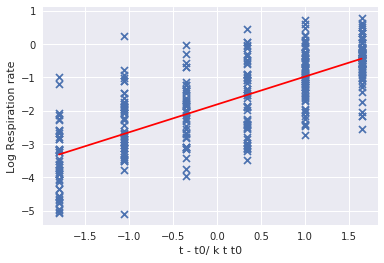

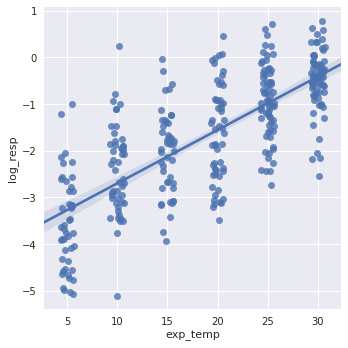

In [5]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x1", "log_resp", data=workingdf,  marker='x')
plt.plot(workingdf["x1"], model1.params[0] + workingdf["x1"]*model1.params[1], color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('t - t0/ k t t0')
plt.show()

p = sns.lmplot(x = "exp_temp", y = "log_resp", data= workingdf, x_jitter= 0.7)

In [6]:
y1 = (workingdf["log_resp"]).values.reshape(-1,1)
x1 = (workingdf["x1"]).values.reshape(-1,1)

print("Sci-Kit Learn Method")
model2 = LR()
model2.fit(x1, y1)
print(model2.coef_[0][0])
print(model2.intercept_[0])

aov_table1 = ap.stats.anova_lm(model1, typ=2)
print(aov_table1)


Sci-Kit Learn Method
0.8352034479495627
-1.8135312205781633
              sum_sq     df           F        PR(>F)
x1        332.973454    1.0  427.416289  9.974282e-62
Residual  260.198631  334.0         NaN           NaN


## 1/kt

In [7]:
print("Statsmodel.Formula.Api Method")
model3 = smf.ols(formula='log_resp ~ x2', data=workingdf).fit()
print(model3.params)
model3.summary()
print("\nThe aic of this model is: ", model3.aic, "\nand the bic is: ", model3.bic)


Statsmodel.Formula.Api Method
Intercept    31.532888
x2           -0.835203
dtype: float64

The aic of this model is:  871.6229675524626 
and the bic is:  879.257189872389


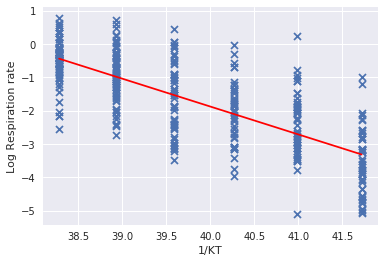

In [8]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x2", "log_resp", data=workingdf,  marker='x')
plt.plot(workingdf["x2"], model3.params[0] + workingdf["x2"]*model3.params[1], color='red')
plt.ylabel('Log Respiration rate')
plt.xlabel('1/KT')
plt.show()



0.74081822068171788

## x2 on log_resp_mass

ln(resp * mass ^ -3/4) = ln(B0) - E (1/kT)

In [9]:
print("Statsmodel.Formula.Api Method")
model4 = smf.ols(formula='log_mass_resp ~ x2', data=workingdf).fit()
print(model4.params)
model4.summary()
print("\nThe aic of this model is: ", model4.aic, "\nand the bic is: ", model4.bic)

Statsmodel.Formula.Api Method
Intercept    28.493834
x2           -0.799772
dtype: float64

The aic of this model is:  574.2561801277448 
and the bic is:  581.8904024476711


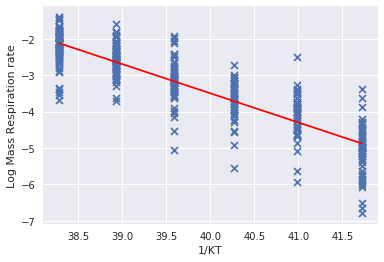

In [10]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x2", "log_mass_resp", data=workingdf,  marker='x')
plt.plot(workingdf["x2"], model4.params[0] + workingdf["x2"]*model4.params[1], color='red')
plt.ylabel('Log Mass Respiration rate')
plt.xlabel('1/KT')
plt.show()



# ln(mass) by ln(I e ^ (E/kt))

In [11]:
workingdf = workingdf.assign(lnIEkt = lambda x: np.log((x.resp) * np.exp(model4.params[1]/(k *workingdf["Exp_Temp_K"]))))
lnm, lnE = workingdf["lnmass"].values.reshape(-1,1) , workingdf["lnIEkt"].values.reshape(-1,1)
workingdf

,stream,stream_temp,exp_temp,mass,resp,Exp_Temp_K,log_resp,mass_g,x1,x2,log_mass_resp,lnmass,mass_resp,lnIEkt
0,11,5.6,5,3.014683,0.010438,278.15,-4.562267,0.003015,-1.794270,41.720374,-5.389888,1.103495,0.004562,-37.929049
1,11,5.6,5,3.014683,0.016002,278.15,-4.135015,0.003015,-1.794270,41.720374,-4.962636,1.103495,0.006994,-37.501797
2,11,5.6,5,11.716683,0.039203,278.15,-3.239007,0.011717,-1.794270,41.720374,-5.084767,2.461014,0.006190,-36.605788
3,11,5.6,5,11.716683,0.042461,278.15,-3.159176,0.011717,-1.794270,41.720374,-5.004936,2.461014,0.006705,-36.525958
4,11,5.6,5,13.338753,0.042687,278.15,-3.153868,0.013339,-1.794270,41.720374,-5.096873,2.590674,0.006116,-36.520650
5,11,5.6,5,13.338753,0.076883,278.15,-2.565466,0.013339,-1.794270,41.720374,-4.508471,2.590674,0.011015,-35.932248
6,11,5.6,5,23.529307,0.366810,278.15,-1.002910,0.023529,-1.794270,41.720374,-3.371595,3.158247,0.034335,-34.369692
7,11,5.6,10,16.986706,0.198874,283.15,-1.615086,0.016987,-1.057552,40.983656,-3.739409,2.832431,0.023768,-34.392661
8,11,5.6,10,21.959874,0.143871,283.15,-1.938837,0.021960,-1.057552,40.983656,-4.255750,3.089217,0.014182,-34.716412
9,11,5.6,10,29.566405,0.227699,283.15,-1.479730,0.029566,-1.057552,40.983656,-4.019709,3.386639,0.017958,-34.257305


In [12]:
print("Statsmodel.Formula.Api Method")
model5 = smf.ols(formula='lnIEkt ~ lnmass', data=workingdf).fit()
print(model5.params)
model5.summary()
print("\nThe aic of this model is: ", model5.aic, "\nand the bic is: ", model5.bic)

Statsmodel.Formula.Api Method
Intercept   -35.478894
lnmass        0.923802
dtype: float64

The aic of this model is:  1417.5361959638785 
and the bic is:  1425.170418283805


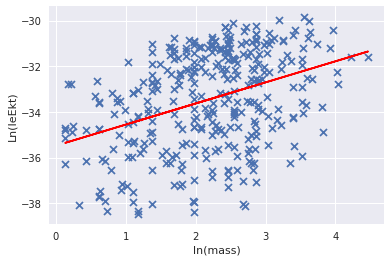

In [13]:
plt.scatter("lnmass", "lnIEkt", data=workingdf,  marker='x')
plt.plot(lnm, model5.params[0] + lnm*model5.params[1], color='red')
plt.ylabel('Ln(IeEkt)')
plt.xlabel('ln(mass)')
plt.show()

# Groupby

In [14]:
grouped = workingdf.groupby("stream_temp")
model_acc_exp = smf.ols(formula="log_mass_resp ~ x2*stream_temp", data= workingdf).fit()

aov_table2 = ap.stats.anova_lm(model_acc_exp, typ=2)
print(aov_table2)


                    sum_sq     df            F         PR(>F)
stream_temp       7.681095    6.0     4.511884   2.084609e-04
x2              298.125256    1.0  1050.714665  2.087777e-103
x2:stream_temp    8.341505    6.0     4.899810   8.226495e-05
Residual         91.362894  322.0          NaN            NaN



                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     70.51
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           5.31e-10
Time:                        15:49:11   Log-Likelihood:                -22.796
No. Observations:                  38   AIC:                             49.59
Df Residuals:                      36   BIC:                             52.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2562      2.472      6.982      0

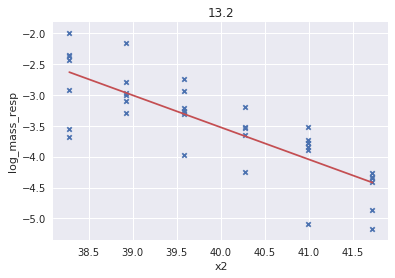


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           5.77e-14
Time:                        15:49:11   Log-Likelihood:                -23.182
No. Observations:                  38   AIC:                             50.36
Df Residuals:                      36   BIC:                             53.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0813      2.497     10.446      0

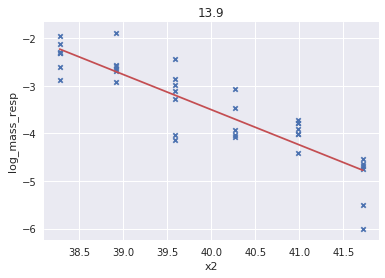


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     336.1
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           1.43e-25
Time:                        15:49:11   Log-Likelihood:                -37.455
No. Observations:                  59   AIC:                             78.91
Df Residuals:                      57   BIC:                             83.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4030      1.992     16.771      0

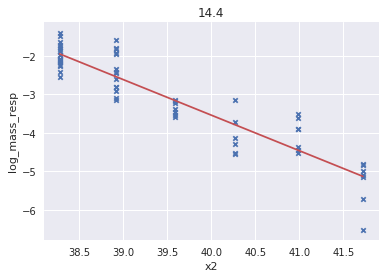


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     159.2
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           5.20e-17
Time:                        15:49:12   Log-Likelihood:                -49.034
No. Observations:                  51   AIC:                             102.1
Df Residuals:                      49   BIC:                             105.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2804      3.056     11.546      0

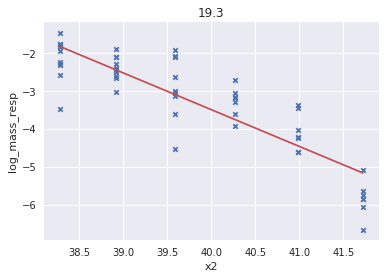


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     114.4
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           3.51e-14
Time:                        15:49:12   Log-Likelihood:                -41.513
No. Observations:                  49   AIC:                             87.03
Df Residuals:                      47   BIC:                             90.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.1028      2.644      9.493      0

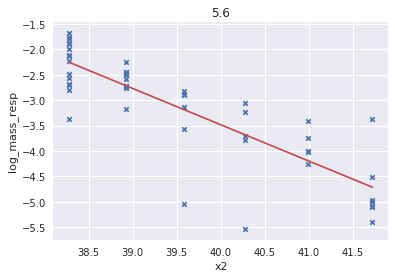


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     66.24
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           7.35e-09
Time:                        15:49:12   Log-Likelihood:                -26.930
No. Observations:                  30   AIC:                             57.86
Df Residuals:                      28   BIC:                             60.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6286      4.127      7.422      0

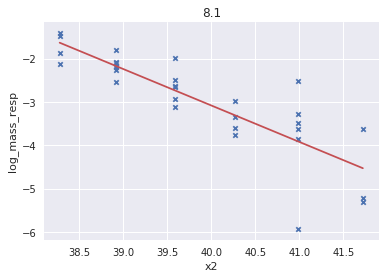


                             OLS Regression Results                            
Dep. Variable:          log_mass_resp   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     239.3
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           4.02e-24
Time:                        15:49:13   Log-Likelihood:                -51.075
No. Observations:                  71   AIC:                             106.2
Df Residuals:                      69   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1634      2.053     13.720      0

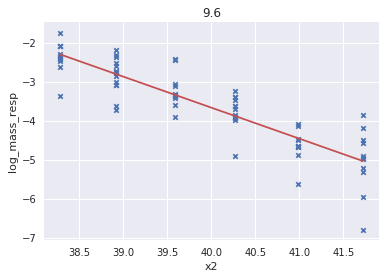

In [15]:
for name, group in grouped:
    #print("Statsmodel.Formula.Api Method")
    modelgroup = smf.ols(formula='log_mass_resp ~ x2', data=group).fit()
    y = modelgroup.params[0] + (modelgroup.params[1] * group.x2)
    print("\n", modelgroup.summary())
    print("\n" ,modelgroup.params)
    print("\nStream Temp: ",name)
    print("\nThe aic of this model is: ", modelgroup.aic, "\nand the bic is: ", modelgroup.bic)
    group.plot.scatter(x = "x2", y = "log_mass_resp", marker = "x", title = name)
    plt.plot(group.x2, y, "r" )
    plt.show()


In [16]:
averageint = (22.436 + 31.262 + 38.583 + 40.461 + 30.283 + 35.810 + 33.344) / 7
averagecoef = -(0.52 + 0.74 + 0.923 + 0.97 + 0.715 + 0.843 + 0.8) / 7
print(averagecoef, averageint)

-0.7872857142857141 33.16842857142858


# NLLS

## Groupby

0.05282203483212601
0.8352034479495627
True
[[Variables]]
    mass_resp_coef:    0.39861185 +/- 0        (0.00%) (init= 0.7997719)
    mass_resp_at_10:   0.04956901 +/- 0        (0.00%) (init= 0.05282203)
    Eh:                1.8 (fixed)
    Temp_H_K:          303        +/- 0        (0.00%) (init= 303)
    boltz:             8.61733e-05 (fixed)


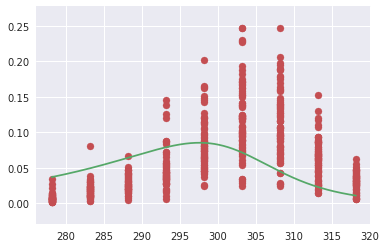

AIC value: -3034.69 
BIC value: -3021.88 
Eh Parameter <Parameter 'Eh', value=1.8 (fixed), bounds=[-inf:inf]>


In [54]:
def schoolfield(param, x, workingdf = None):
    E = param["mass_resp_coef"]
    B0 = param["mass_resp_at_10"]
    Eh = param["Eh"]
    Th = param["Temp_H_K"]
    #Tl = param["Temp_L_K"]
    #El = param["Temp_L_K"]
    K = param["boltz"]
    exp1 = ((-E)/K) * (1/x - 1/283.15)
    #print(exp1)
    exp2 = (Eh/K) * (1/Th - 1/x)
    #print(exp2)
    #exp3 = (El/K) * (1/Tl - 1/x)
    #model = (B0 * np.exp(exp1))/(1 + np.exp(exp3) + np.exp(exp2))
    model = (B0 * np.exp(exp1))/(1 + np.exp(exp2))
    
    if workingdf is None:
        return model
    
    return model - workingdf

mass_resp_10 = np.exp(model1.params[0] + (283 - 291)/(k * 283 * 291))
av_mass_resp_10 = np.log(averageint)
print(mass_resp_10)
print(model1.params[1])
last_EH_aic_val = 100000
last_EH_bic_val = 100000
Eh = 1.8

try_params = Parameters()
try_params.add_many(("mass_resp_coef", -(model4.params[1]),True, 0, 1),
               ("mass_resp_at_10", mass_resp_10 ,True),
               ("Eh", Eh, False),# -(model4.params[1]), 5),
               ("Temp_H_K", 303, True, 303, 310),
               #("Temp_L_K", Temp_L_K, True, 273, 283),
               ("boltz", k, False))
               #("El", 0.3, True, -2.0, 2.0))
               #("mass_resp_intercept", mass_resp_intercept_lr, True, 30, 35))

data = new_df.mass_resp.values

x = np.linspace(new_df["Exp_Temp_K"].min(),new_df["Exp_Temp_K"].max(),len(new_df["Exp_Temp_K"]))




#try_params.add("Eh", value =random.uniform(-model4.params[1],5), vary = False)
trying = minimize(schoolfield, try_params, args=(x, data))   
print(trying.success)
# calculate final result
final = data + trying.residual
# write error report
report_fit(trying.params)


# plot the data
plt.scatter(x = "Exp_Temp_K", y =  "mass_resp", marker ='o', color = "r", data=new_df)
plt.plot(x, final, 'g')
plt.show()   
print("AIC value: {0:.2f} \nBIC value: {1:.2f} \nEh Parameter {2}".format(trying.aic, trying.bic, try_params["Eh"]))

In [53]:
grouped2 = new_df.groupby("stream_temp")

for name, group in grouped2: 
    best_EH_param = 1000
    best_stream = 0

    last_EH_aic_val = 100000
    last_EH_bic_val = 100000
    
    for l in range(1,10000): 
        try:
            x = np.linspace(group["Exp_Temp_K"].min(),group["Exp_Temp_K"].max(),len(group["Exp_Temp_K"]))
            data = group.mass_resp.values
            try_params.add("Eh", value =random.uniform(-model4.params[1],5), vary = False)
            #print(try_params["Eh"])
            trying = minimize(schoolfield, try_params, args=(x, data))   
            #print(trying.success)
            # calculate final result
            final = data + trying.residual
            # write error report
            #report_fit(trying)
            
            #if trying.aic < 300:
            #    fname = "../Results/Plot_sch" + str(l) + "-" + name + ".pdf"
            #    print(fname)
            #    # plot the data
            #    group.plot.scatter(x = "Exp_Temp_K", y =  "mass_resp", marker ='o', color = "r")
            #    #plt.plot(x, data, 'bo')
            #    plt.plot(x, final, 'g')
            #    plt.savefig(fname)
            #    plt.show()

            if (trying.aic < last_EH_aic_val and trying.bic < last_EH_bic_val): 
                best_stream = name
                best_EH_param = try_params["Eh"]
                last_EH_aic_val = trying.aic
                last_EH_bic_val = trying.bic
                best_params = trying.params
                best_r2 = (1 - trying.residual.var() / np.var(data))

            #print("Round: {0} ".format(l))
            #print("The stream temp was: ", name)
            #print("AIC value: {0:.2f} \nBIC value: {1:.2f} \nEh Parameter {2} \nReduced chi value {3:.2f}".format(trying.aic, trying.bic, try_params["Eh"], trying.redchi))
            #print("The best EH value so far: ", best_EH_param, "\nand the stream which it was from: ", best_stream, 
            #      "\nThe aic of that: ", last_EH_aic_val,
            #      "\nand the bic of that: ", last_EH_bic_val)
            #return(best_EH_param, last_EH_aic_val, last_EH_bic_val)   
            #print("-----------------------\n-----------------------")
            #with open(("../Results/Output_sch" + str(l) + "-" + name + ".txt"), "w") as text_file:
            #    print("Round: {0} ".format(l), file = text_file)
            #    print("The stream temp was: {0} ".format(name), file = text_file)
            #    print("AIC value: {0:.2f} \nBIC value: {1:.2f} \nEh Parameter {2} \nReduced chi value: {3:.2f}".format(trying.aic, trying.bic, try_params["Eh"], trying.redchi),file = text_file)
            #text_file.close()
        except:
            print("this didn't work")
    with open(("../Results/Best_values" + name + ".txt"), "w") as text_file: 
        print(best_stream, best_EH_param, last_EH_aic_val, last_EH_bic_val,best_params, best_r2, file=text_file)
    text_file.close()
    print("The final values: \nThe stream temp: ",best_stream, "\nand the EH value: ", best_EH_param, "\nthe aic value: ",
          last_EH_aic_val, "\nfinally, the bic value: ",last_EH_bic_val, best_r2, "R-squared", best_params)
    print("-----------------------\n-----------------------")


The final values: 
The stream temp:  13.2 
and the EH value:  <Parameter 'Eh', value=4.0698558425356968 (fixed), bounds=[None:None]> 
the aic value:  -424.96320548 
finally, the bic value:  -418.781876449 0.620019128856 R-squared Parameters([('mass_resp_coef', <Parameter 'mass_resp_coef', value=0.59509722140456678 +/- 0.0989, bounds=[0:1]>), ('mass_resp_at_10', <Parameter 'mass_resp_at_10', value=0.018281087733491217 +/- 0.00432, bounds=[-inf:inf]>), ('Eh', <Parameter 'Eh', value=4.0698558425356968 (fixed), bounds=[None:None]>), ('Temp_H_K', <Parameter 'Temp_H_K', value=310.24677476594371 +/- 0.792, bounds=[-inf:inf]>), ('boltz', <Parameter 'boltz', value=8.6173303e-05 (fixed), bounds=[None:None]>)])
-----------------------
-----------------------
The final values: 
The stream temp:  13.9 
and the EH value:  <Parameter 'Eh', value=2.118294375550529 (fixed), bounds=[None:None]> 
the aic value:  -423.583956488 
finally, the bic value:  -417.351344156 0.608030704674 R-squared Parameters([

 - Adding parameter "a"
 - Adding parameter "b"
 - Adding parameter "c"
 - Adding parameter "d"


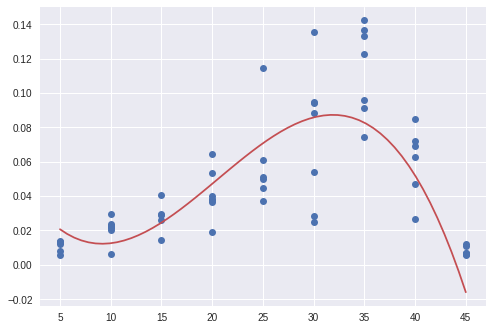

0.575124088272
{'d': 0.058574549857471944, 'a': -1.2754848848158364e-05, 'c': -0.01118273923611667, 'b': 0.00078567052700595507}
Stream temp was:  13.2
The aic was:  -415.424835239 
and the bic was:  -407.183063197
------------------------
------------------------
 - Adding parameter "a"
 - Adding parameter "b"
 - Adding parameter "c"
 - Adding parameter "d"


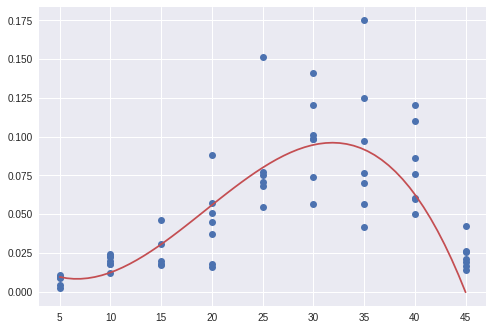

0.610565713299
{'d': 0.030157175457953045, 'a': -1.1015722658082754e-05, 'c': -0.0070620353327594931, 'b': 0.0006375287526844619}
Stream temp was:  13.9
The aic was:  -420.918834355 
and the bic was:  -412.608684579
------------------------
------------------------
 - Adding parameter "a"
 - Adding parameter "b"
 - Adding parameter "c"
 - Adding parameter "d"


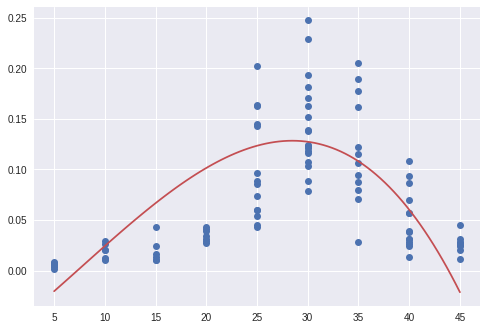

0.577182264832
{'d': -0.062034353672390033, 'a': -6.9666577760385577e-06, 'c': 0.0077180032095736711, 'b': 0.00016213211760322135}
Stream temp was:  14.4
The aic was:  -587.89470722 
and the bic was:  -577.764309247
------------------------
------------------------
 - Adding parameter "a"
 - Adding parameter "b"
 - Adding parameter "c"
 - Adding parameter "d"


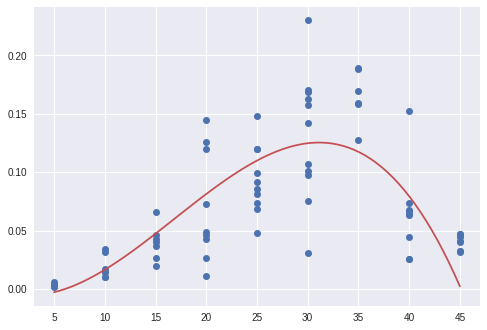

0.566495636661
{'d': -0.0020398453838808678, 'a': -1.1253243705716754e-05, 'c': -0.0027071325531213106, 'b': 0.00056864101612155986}
Stream temp was:  19.3
The aic was:  -475.061301783 
and the bic was:  -465.84504141
------------------------
------------------------
 - Adding parameter "a"
 - Adding parameter "b"
 - Adding parameter "c"
 - Adding parameter "d"


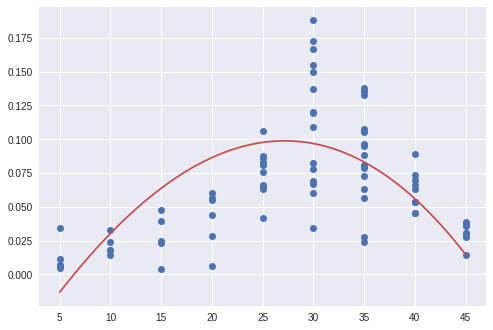

0.531611199691
{'d': -0.06604761875934935, 'a': -9.1132609084870589e-07, 'c': 0.011462781394605678, 'b': -0.00017383981177431215}
Stream temp was:  5.6
The aic was:  -574.088635277 
and the bic was:  -564.413272845
------------------------
------------------------
 - Adding parameter "a"
 - Adding parameter "b"
 - Adding parameter "c"
 - Adding parameter "d"


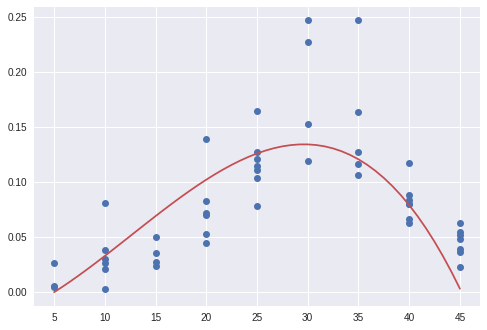

0.548985159763
{'d': -0.023642820414007785, 'a': -8.3302493886557902e-06, 'c': 0.0033393483014452232, 'b': 0.00031381758412567121}
Stream temp was:  8.1
The aic was:  -305.794638927 
and the bic was:  -298.227357735
------------------------
------------------------
 - Adding parameter "a"
 - Adding parameter "b"
 - Adding parameter "c"
 - Adding parameter "d"


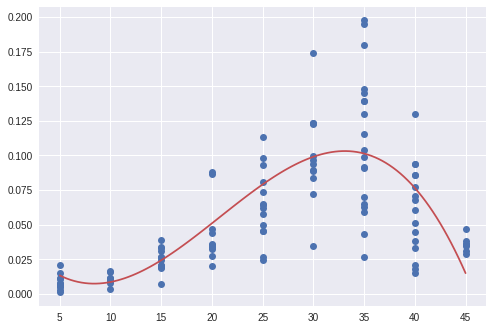

0.57795065334
{'d': 0.048055630812454501, 'a': -1.2718288020691985e-05, 'c': -0.010599970232531444, 'b': 0.00079150969059475383}
Stream temp was:  9.6
The aic was:  -784.124016839 
and the bic was:  -773.214465564
------------------------
------------------------


In [37]:
def cubic(x, a, b, c, d):
    cubed = a*(x**3)
    squared = b*(x**2)
    model = cubed + squared + (c*x) + d
    
    return model

x_cubic1 = np.linspace(new_df["exp_temp"].min(),new_df["exp_temp"].max(),len(new_df["exp_temp"]))

cModel = Model(cubic)

for name, group in grouped2: 
    try:
        x_cubic = np.linspace(group["exp_temp"].min(),group["exp_temp"].max(),len(group["exp_temp"]))
        data_c = group.mass_resp.values
        trying_cubic = cModel.fit(data_c, x = x_cubic, a = -1.1, b = 0.001, c = 5, d = 0.03)
           
        fname = "../Results/Plot_cubic" + "-" + name + ".pdf"
        plt.plot(group["exp_temp"], group["mass_resp"], 'bo')
        #plt.plot(x_cubic, trying_cubic.init_fit, 'k--')
        plt.plot(x_cubic, trying_cubic.best_fit, 'r-')
        plt.savefig(fname)
        plt.show()
        #print(trying_cubic.residual)
        #print(trying_cubic.values)
        print((1 - trying_cubic.residual.var()/np.var(data_c))) 
        print(trying_cubic.best_values)
        print("Stream temp was: ", name)
        print("The aic was: ", trying_cubic.aic, "\nand the bic was: ", trying_cubic.bic)
        print("------------------------\n------------------------")
    except:
        print("This didn't work")



# Now with feeding data


## Importing df

In [9]:
df2 = pd.read_csv('../Data/snail_feeding_EG.csv', sep =',')


new_df2 = df2[["stream_temp", "exp_temp", "mass","feeding"]]




In [11]:
# y = t - t0/ k t t0   t0 normally mean of t approx
workingdf2 = new_df2.assign(Exp_Temp_K = new_df2["exp_temp"] + 273.15)
workingdf2 = workingdf2.assign(feeding_new = lambda x: abs(x.feeding))
workingdf2 = workingdf2.assign(log_feeding = lambda x: np.log(x.feeding_new))
workingdf2 = workingdf2.assign(mass_g = lambda x: x["mass"]/1000)
workingdf2 = workingdf2.assign(x1 = lambda x: ((x["Exp_Temp_K"] - 290.65)/(k*x["Exp_Temp_K"]*290.65)))
workingdf2 = workingdf2.assign(x2 = lambda x: (1/(k * x["Exp_Temp_K"]) ))
workingdf2 = workingdf2.assign(log_mass_feed = lambda x: np.log(x["feeding_new"] * (x["mass"]**(-3./4))))
workingdf2 = workingdf2.assign(lnmass = lambda x: np.log(x["mass"]))
workingdf2 = workingdf2.assign(feed_mass = lambda x: x["feeding_new"] * (x["mass"]**(-3./4)))
workingdf2 = workingdf2.dropna()
new_df2 = workingdf2
workingdf2 = workingdf2[(workingdf2["exp_temp"] <= 30)]
workingdf2 = workingdf2[(workingdf2["feeding"] > 0)]
workingdf2 = workingdf2.assign(new_feed = lambda x: x.feeding_new * (x["mass"]**(-3./4)))
workingdf2

#M = workingdf2["mass_g"]
#T = workingdf2["Exp_Temp_K"] 
#b = 0.75
#power = (k * T)
#workingdf = workingdf.loc[(workingdf["exp_temp"] < 31) & (workingdf["exp_temp"] > 14)]

,stream_temp,exp_temp,mass,feeding,Exp_Temp_K,feeding_new,log_feeding,mass_g,x1,x2,log_mass_feed,lnmass,feed_mass,new_feed
0,14.4,5.2,0.014727,0.019828,278.35,0.019828,-3.920670,0.000015,-1.764293,41.690397,-0.757097,-4.218097,0.469026,0.469026
1,14.4,5.2,0.025781,0.017679,278.35,0.017679,-4.035368,0.000026,-1.764293,41.690397,-1.291788,-3.658106,0.274779,0.274779
2,14.4,5.2,0.028129,0.006144,278.35,0.006144,-5.092221,0.000028,-1.764293,41.690397,-2.413995,-3.570967,0.089457,0.089457
3,14.4,5.2,0.036804,0.001282,278.35,0.001282,-6.659610,0.000037,-1.764293,41.690397,-4.183006,-3.302139,0.015253,0.015253
4,14.4,5.2,0.041545,0.028762,278.35,0.028762,-3.548713,0.000042,-1.764293,41.690397,-1.162979,-3.180979,0.312554,0.312554
5,14.4,8.5,0.010902,0.017001,281.65,0.017001,-4.074504,0.000011,-1.275821,41.201925,-0.685380,-4.518831,0.503899,0.503899
7,14.4,8.5,0.024544,0.024577,281.65,0.024577,-3.705926,0.000025,-1.275821,41.201925,-0.925467,-3.707279,0.396346,0.396346
8,14.4,8.5,0.038102,0.021072,281.65,0.021072,-3.859821,0.000038,-1.275821,41.201925,-1.409196,-3.267501,0.244340,0.244340
9,14.4,8.5,0.035396,0.002526,281.65,0.002526,-5.981278,0.000035,-1.275821,41.201925,-3.475405,-3.341164,0.030949,0.030949
10,14.4,13.1,0.009929,0.009047,286.25,0.009047,-4.705332,0.000010,-0.613711,40.539815,-1.246103,-4.612305,0.287623,0.287623


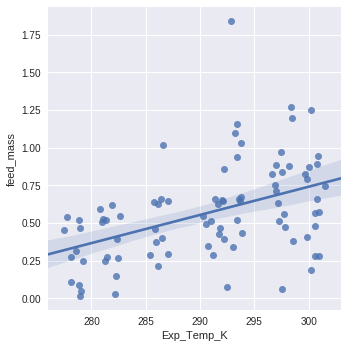

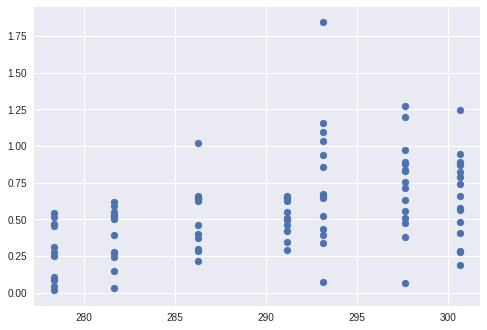

In [24]:
plotting = sns.lmplot("Exp_Temp_K","feed_mass", data = workingdf2, x_jitter = True)
plt.show()

plt.scatter("Exp_Temp_K","feed_mass", data = workingdf2)
plt.show()

## Trying T - t0/ TT0K

In [25]:
print("Statsmodel.Formula.Api Method")
model6 = smf.ols(formula='log_feeding ~ x1', data=workingdf2).fit()
print(model6.params)
model6.summary()
print("\nThe aic of this model is: ", model6.aic, "\nand the bic is: ", model6.bic)


Statsmodel.Formula.Api Method
Intercept   -3.707901
x1           0.337106
dtype: float64

The aic of this model is:  185.702646709 
and the bic is:  190.679919449


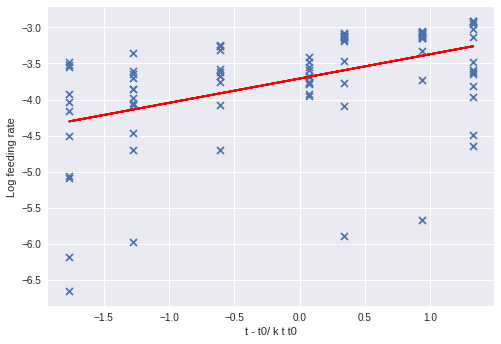

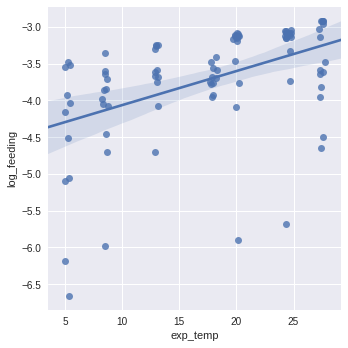

In [26]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x1", "log_feeding", data=workingdf2,  marker='x')
plt.plot(workingdf2["x1"], model6.params[0] + (workingdf2["x1"]*model6.params[1]), color='red')
plt.ylabel('Log feeding rate')
plt.xlabel('t - t0/ k t t0')
plt.show()

p = sns.lmplot(x = "exp_temp", y = "log_feeding", data= workingdf2, x_jitter= 0.3)

In [27]:
y11 = (workingdf2["log_feeding"]).values.reshape(-1,1)
x11 = (workingdf2["x1"]).values.reshape(-1,1)

print("Sci-Kit Learn Method")
model7 = LR()
model7.fit(x11, y11)
print(model7.coef_[0][0])
print(model7.intercept_[0])

Sci-Kit Learn Method
0.337105686465
-3.70790124378


## 1/kt

Statsmodel.Formula.Api Method
Intercept    9.751415
x2          -0.337106
dtype: float64

The aic of this model is:  185.702646709 
and the bic is:  190.679919449


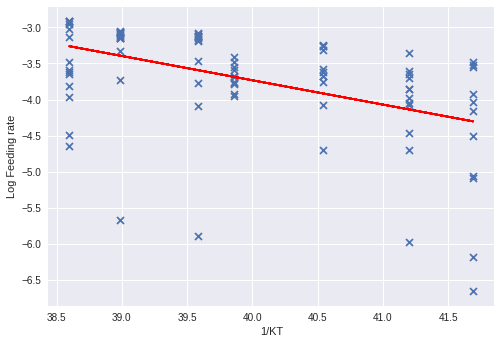

In [28]:
print("Statsmodel.Formula.Api Method")
model8 = smf.ols(formula='log_feeding ~ x2', data=workingdf2).fit()
print(model8.params)
model8.summary()
print("\nThe aic of this model is: ", model8.aic, "\nand the bic is: ", model8.bic)

#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x2", "log_feeding", data=workingdf2,  marker='x')
plt.plot(workingdf2["x2"], model8.params[0] + workingdf2["x2"]*model8.params[1], color='red')
plt.ylabel('Log Feeding rate')
plt.xlabel('1/KT')
plt.show()

## x2 on log_resp_mass

ln(resp * mass ^ -3/4) = ln(B0) - E (1/kT)

In [29]:
print("Statsmodel.Formula.Api Method")
model9 = smf.ols(formula='log_mass_feed ~ x2', data=workingdf2).fit()
print(model9.params)
model9.summary()
print("\nThe aic of this model is: ", model9.aic, "\nand the bic is: ", model9.bic)

Statsmodel.Formula.Api Method
Intercept    12.820812
x2           -0.340756
dtype: float64

The aic of this model is:  197.709138233 
and the bic is:  202.686410973


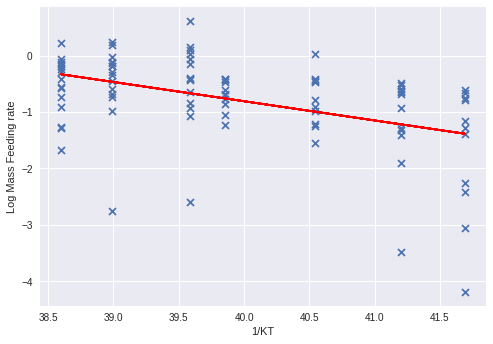

In [30]:
#sns.stripplot(x='x1', y='log_resp', data= workingdf, jitter=True) 
plt.scatter("x2", "log_mass_feed", data=workingdf2,  marker='x')
plt.plot(workingdf2["x2"], model9.params[0] + workingdf2["x2"]*model9.params[1], color='red')
plt.ylabel('Log Mass Feeding rate')
plt.xlabel('1/KT')
plt.show()


# ln(mass) by ln(I e ^ (E/kt))


In [31]:
def f(row):
    if row['exp_temp'] < 14:
        val = 1
    elif row['exp_temp'] < 21:
        val = 2
    else:
        val = 3
    return val

workingdf2 = workingdf2.assign(lnIEkt = lambda x: np.log((x.feeding_new) * np.exp(model9.params[1]/(k *workingdf2["Exp_Temp_K"]))))
lnm, lnE = workingdf2["lnmass"].values.reshape(-1,1) , workingdf2["lnIEkt"].values.reshape(-1,1)
workingdf2["Temps"] = workingdf2.apply(f, axis = 1)
workingdf2




,stream_temp,exp_temp,mass,feeding,Exp_Temp_K,feeding_new,log_feeding,mass_g,x1,x2,log_mass_feed,lnmass,feed_mass,lnIEkt,Temps
0,14.4,5.2,0.014727,0.019828,278.35,0.019828,-3.920670,0.000015,-1.764293,41.690397,-0.757097,-4.218097,0.469026,-18.126930,1
1,14.4,5.2,0.025781,0.017679,278.35,0.017679,-4.035368,0.000026,-1.764293,41.690397,-1.291788,-3.658106,0.274779,-18.241629,1
2,14.4,5.2,0.028129,0.006144,278.35,0.006144,-5.092221,0.000028,-1.764293,41.690397,-2.413995,-3.570967,0.089457,-19.298481,1
3,14.4,5.2,0.036804,0.001282,278.35,0.001282,-6.659610,0.000037,-1.764293,41.690397,-4.183006,-3.302139,0.015253,-20.865871,1
4,14.4,5.2,0.041545,0.028762,278.35,0.028762,-3.548713,0.000042,-1.764293,41.690397,-1.162979,-3.180979,0.312554,-17.754973,1
5,14.4,8.5,0.010902,0.017001,281.65,0.017001,-4.074504,0.000011,-1.275821,41.201925,-0.685380,-4.518831,0.503899,-18.114314,1
7,14.4,8.5,0.024544,0.024577,281.65,0.024577,-3.705926,0.000025,-1.275821,41.201925,-0.925467,-3.707279,0.396346,-17.745737,1
8,14.4,8.5,0.038102,0.021072,281.65,0.021072,-3.859821,0.000038,-1.275821,41.201925,-1.409196,-3.267501,0.244340,-17.899632,1
9,14.4,8.5,0.035396,0.002526,281.65,0.002526,-5.981278,0.000035,-1.275821,41.201925,-3.475405,-3.341164,0.030949,-20.021089,1
10,14.4,13.1,0.009929,0.009047,286.25,0.009047,-4.705332,0.000010,-0.613711,40.539815,-1.246103,-4.612305,0.287623,-18.519525,1


Statsmodel.Formula.Api Method
Intercept   -16.702154
lnmass        0.160491
dtype: float64

The aic of this model is:  252.719165253 
and the bic is:  257.696437992


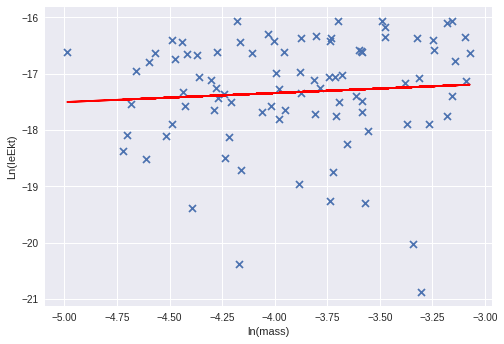

In [32]:
print("Statsmodel.Formula.Api Method")
model10 = smf.ols(formula='lnIEkt ~ lnmass', data=workingdf2).fit()
print(model10.params)
model10.summary()
print("\nThe aic of this model is: ", model10.aic, "\nand the bic is: ", model10.bic)

plt.scatter("lnmass", "lnIEkt", data=workingdf2,  marker='x')
plt.plot(lnm, model10.params[0] + lnm*model10.params[1], color='red')
plt.ylabel('Ln(IeEkt)')
plt.xlabel('ln(mass)')
plt.show()

# Groupby

In [33]:

grouped_feed = workingdf2.groupby("stream_temp")
workingdf2

,stream_temp,exp_temp,mass,feeding,Exp_Temp_K,feeding_new,log_feeding,mass_g,x1,x2,log_mass_feed,lnmass,feed_mass,lnIEkt,Temps
0,14.4,5.2,0.014727,0.019828,278.35,0.019828,-3.920670,0.000015,-1.764293,41.690397,-0.757097,-4.218097,0.469026,-18.126930,1
1,14.4,5.2,0.025781,0.017679,278.35,0.017679,-4.035368,0.000026,-1.764293,41.690397,-1.291788,-3.658106,0.274779,-18.241629,1
2,14.4,5.2,0.028129,0.006144,278.35,0.006144,-5.092221,0.000028,-1.764293,41.690397,-2.413995,-3.570967,0.089457,-19.298481,1
3,14.4,5.2,0.036804,0.001282,278.35,0.001282,-6.659610,0.000037,-1.764293,41.690397,-4.183006,-3.302139,0.015253,-20.865871,1
4,14.4,5.2,0.041545,0.028762,278.35,0.028762,-3.548713,0.000042,-1.764293,41.690397,-1.162979,-3.180979,0.312554,-17.754973,1
5,14.4,8.5,0.010902,0.017001,281.65,0.017001,-4.074504,0.000011,-1.275821,41.201925,-0.685380,-4.518831,0.503899,-18.114314,1
7,14.4,8.5,0.024544,0.024577,281.65,0.024577,-3.705926,0.000025,-1.275821,41.201925,-0.925467,-3.707279,0.396346,-17.745737,1
8,14.4,8.5,0.038102,0.021072,281.65,0.021072,-3.859821,0.000038,-1.275821,41.201925,-1.409196,-3.267501,0.244340,-17.899632,1
9,14.4,8.5,0.035396,0.002526,281.65,0.002526,-5.981278,0.000035,-1.275821,41.201925,-3.475405,-3.341164,0.030949,-20.021089,1
10,14.4,13.1,0.009929,0.009047,286.25,0.009047,-4.705332,0.000010,-0.613711,40.539815,-1.246103,-4.612305,0.287623,-18.519525,1


## Feeding


                             OLS Regression Results                            
Dep. Variable:          log_mass_feed   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     9.290
Date:                Sat, 13 Jan 2018   Prob (F-statistic):            0.00524
Time:                        22:32:14   Log-Likelihood:                -20.621
No. Observations:                  28   AIC:                             45.24
Df Residuals:                      26   BIC:                             47.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6759      4.056      2.878      0

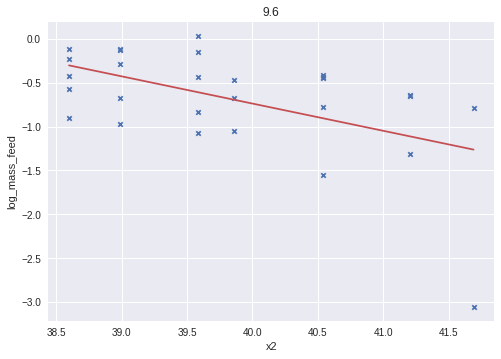


                             OLS Regression Results                            
Dep. Variable:          log_mass_feed   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     13.39
Date:                Sat, 13 Jan 2018   Prob (F-statistic):            0.00104
Time:                        22:32:14   Log-Likelihood:                -36.305
No. Observations:                  30   AIC:                             76.61
Df Residuals:                      28   BIC:                             79.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2682      5.541      3.477      0

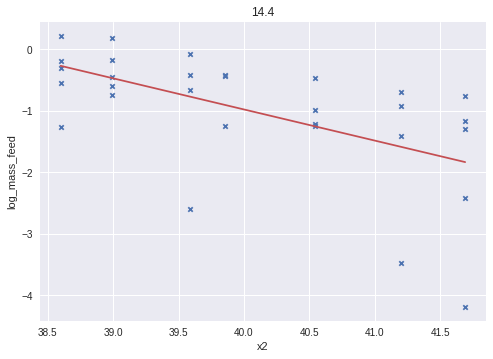


                             OLS Regression Results                            
Dep. Variable:          log_mass_feed   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.922
Date:                Sat, 13 Jan 2018   Prob (F-statistic):              0.176
Time:                        22:32:15   Log-Likelihood:                -33.346
No. Observations:                  31   AIC:                             70.69
Df Residuals:                      29   BIC:                             73.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1686      4.949      1.246      0

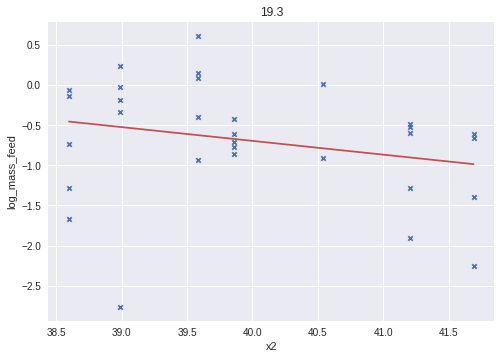

In [34]:
for name, group in grouped_feed:
    #print("Statsmodel.Formula.Api Method")
    modelgroup = smf.ols(formula='log_mass_feed ~ x2', data=group).fit()
    y = modelgroup.params[0] + (modelgroup.params[1] * group.x2)
    print("\n", modelgroup.summary())
    print("\n" ,modelgroup.params)
    print("\nStream Temp: ",name)
    print("\nThe aic of this model is: ", modelgroup.aic, "\nand the bic is: ", modelgroup.bic)
    group.plot.scatter(x = "x2", y = "log_mass_feed", marker = "x", title = name)
    plt.plot(group.x2, y, "r" )
    plt.show()



                             OLS Regression Results                            
Dep. Variable:            feeding_new   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     10.19
Date:                Sat, 13 Jan 2018   Prob (F-statistic):            0.00367
Time:                        22:32:15   Log-Likelihood:                 89.959
No. Observations:                  28   AIC:                            -175.9
Df Residuals:                      26   BIC:                            -173.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.005      3.090      0

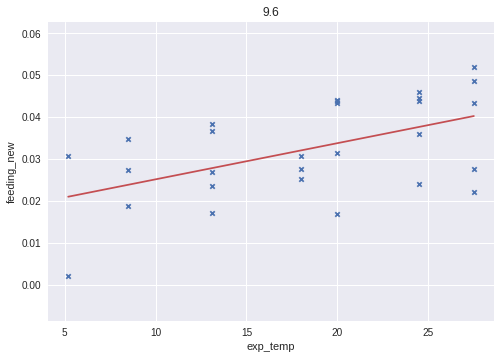


                             OLS Regression Results                            
Dep. Variable:            feeding_new   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     29.31
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           8.96e-06
Time:                        22:32:15   Log-Likelihood:                 92.121
No. Observations:                  30   AIC:                            -180.2
Df Residuals:                      28   BIC:                            -177.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0058      0.005      1.166      0

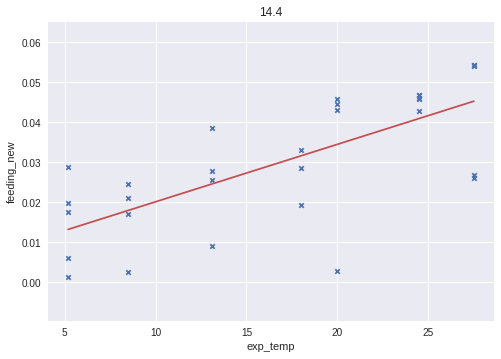


                             OLS Regression Results                            
Dep. Variable:            feeding_new   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5.498
Date:                Sat, 13 Jan 2018   Prob (F-statistic):             0.0261
Time:                        22:32:15   Log-Likelihood:                 91.342
No. Observations:                  31   AIC:                            -178.7
Df Residuals:                      29   BIC:                            -175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0142      0.006      2.421      0

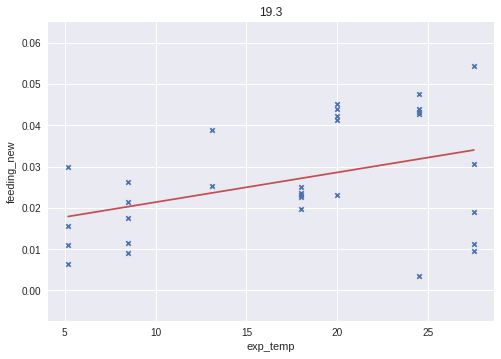

In [35]:
for name, group in grouped_feed:
    #print("Statsmodel.Formula.Api Method")
    modelgroup = smf.ols(formula='feeding_new ~ exp_temp', data=group).fit()
    y = modelgroup.params[0] + (modelgroup.params[1] * group.exp_temp)
    print("\n", modelgroup.summary())
    print("\n" ,modelgroup.params)
    print("\nStream Temp: ",name)
    print("\nThe aic of this model is: ", modelgroup.aic, "\nand the bic is: ", modelgroup.bic)
    group.plot.scatter(x = "exp_temp", y = "feeding_new", marker = "x", title = name)
    plt.plot(group.exp_temp, y, "r" )
    plt.show()
    
 


                             OLS Regression Results                            
Dep. Variable:          log_mass_feed   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     9.000
Date:                Sat, 13 Jan 2018   Prob (F-statistic):            0.00589
Time:                        22:32:16   Log-Likelihood:                -20.737
No. Observations:                  28   AIC:                             45.47
Df Residuals:                      26   BIC:                             48.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4624      0.278     -5.264      0

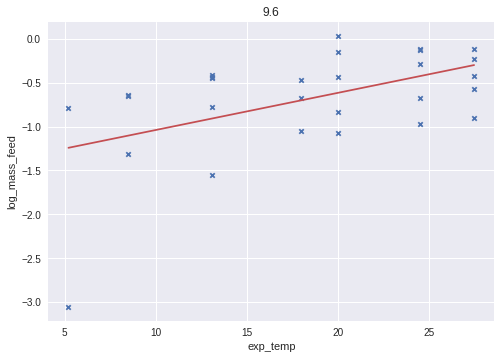


                             OLS Regression Results                            
Dep. Variable:          log_mass_feed   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     13.23
Date:                Sat, 13 Jan 2018   Prob (F-statistic):            0.00110
Time:                        22:32:16   Log-Likelihood:                -36.362
No. Observations:                  30   AIC:                             76.72
Df Residuals:                      28   BIC:                             79.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1772      0.359     -6.064      0

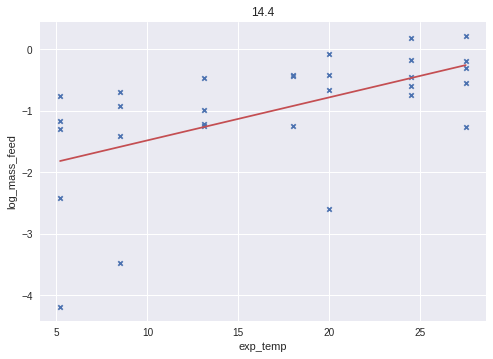


                             OLS Regression Results                            
Dep. Variable:          log_mass_feed   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.818
Date:                Sat, 13 Jan 2018   Prob (F-statistic):              0.188
Time:                        22:32:16   Log-Likelihood:                -33.398
No. Observations:                  31   AIC:                             70.80
Df Residuals:                      29   BIC:                             73.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0935      0.327     -3.344      0

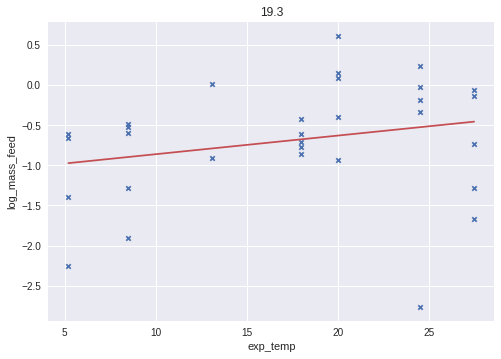

In [36]:
   
for name, group in grouped_feed:
    #print("Statsmodel.Formula.Api Method")
    modelgroup = smf.ols(formula='log_mass_feed ~ exp_temp', data=group).fit()
    y = modelgroup.params[0] + (modelgroup.params[1] * group.exp_temp)
    print("\n", modelgroup.summary())
    print("\n" ,modelgroup.params)
    print("\nStream Temp: ",name)
    print("\nThe aic of this model is: ", modelgroup.aic, "\nand the bic is: ", modelgroup.bic)
    group.plot.scatter(x = "exp_temp", y = "log_mass_feed", marker = "x", title = name)
    plt.plot(group.exp_temp, y, "r" )
    plt.show()    

# Energetic Efficiency:

y = wF/ vI

In [42]:
w = 0.45
v = 3


I5 = np.exp(model3.params[0] + (model3.params[1] * (1/(k * 278))))
I8 = np.exp(model3.params[0] + (model3.params[1] * (1/(k*(8.5 + 273.15) ))))
I13 = np.exp(model3.params[0] + (model3.params[1] * (1/(k*(13.1 + 273.15) ))))
I18 = np.exp(model3.params[0] + (model3.params[1] * (1/(k*(18 + 273.15) ))))
I20 = np.exp(model3.params[0] + (model3.params[1] * (1/(k*(20 + 273.15) ))))
I27 = np.exp(model3.params[0] + (model3.params[1] * (1/(k*(27.5 + 273.15) ))))
print(I5)

def f(row):
    if row['exp_temp'] == 5.2:
        val = ((w * row["feeding_new"])/(v * I5))
    elif row['exp_temp'] == 8.5:
        val = ((w * row["feeding_new"])/(v * I8))
    elif row["exp_temp"] == 13.1:
        val = ((w * row["feeding_new"])/(v * I13))
    elif row["exp_temp"] == 18.0:
        val = ((w * row["feeding_new"])/(v * I18))
    elif row["exp_temp"] == 20.0:
        val = ((w * row["feeding_new"])/(v * I20))
    else: 
        val = ((w * row["feeding_new"])/(v * I27))        
    return val

workingdf2["En_Eff"] = workingdf2.apply(f, axis = 1)
workingdf2 = workingdf2.assign(Log_Eneff = lambda x: np.log(x["En_Eff"]))
workingdf2["Log_Eneff_Mass"] = np.log(workingdf2["En_Eff"] * (workingdf2["mass"]**-3./4))
workingdf2["En_Mass"] = workingdf2["En_Eff"] * (workingdf2["mass"]**3/4)
print(workingdf2)
grouped_feed = workingdf2.groupby("stream_temp")

0.0357604313304
     stream_temp  exp_temp      mass   feeding  Exp_Temp_K  feeding_new  \
0           14.4       5.2  0.014727  0.019828      278.35     0.019828   
1           14.4       5.2  0.025781  0.017679      278.35     0.017679   
2           14.4       5.2  0.028129  0.006144      278.35     0.006144   
3           14.4       5.2  0.036804  0.001282      278.35     0.001282   
4           14.4       5.2  0.041545  0.028762      278.35     0.028762   
5           14.4       8.5  0.010902  0.017001      281.65     0.017001   
7           14.4       8.5  0.024544  0.024577      281.65     0.024577   
8           14.4       8.5  0.038102  0.021072      281.65     0.021072   
9           14.4       8.5  0.035396  0.002526      281.65     0.002526   
10          14.4      13.1  0.009929  0.009047      286.25     0.009047   
11          14.4      13.1  0.024434  0.038676      286.25     0.038676   
12          14.4      13.1  0.027768  0.025558      286.25     0.025558   
13       

Statsmodel.Formula.Api Method
Intercept   -25.951428
x2            0.553758
dtype: float64

The aic of this model is:  186.224693976 
and the bic is:  191.201966715


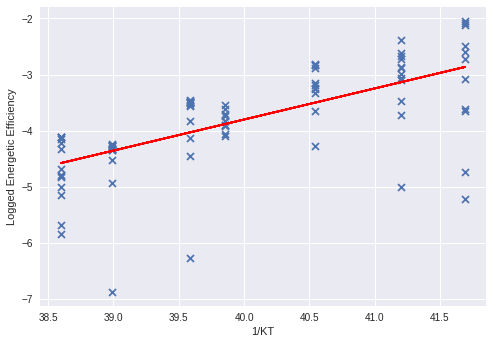

Statsmodel.Formula.Api Method
Intercept   -15.060134
x2            0.539156
dtype: float64

The aic of this model is:  327.690743101 
and the bic is:  332.66801584


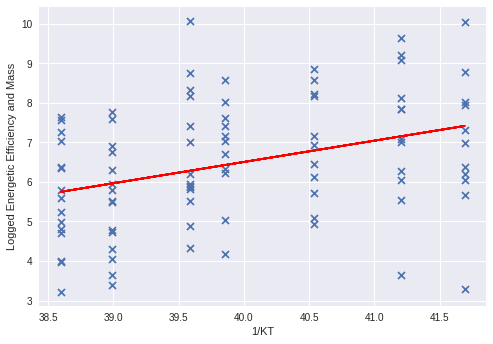

In [43]:
print("Statsmodel.Formula.Api Method")
model11 = smf.ols(formula='Log_Eneff ~ x2', data=workingdf2).fit()
print(model11.params)
model11.summary()
print("\nThe aic of this model is: ", model11.aic, "\nand the bic is: ", model11.bic)

plt.scatter("x2", "Log_Eneff", data=workingdf2,  marker='x')
plt.plot(workingdf2["x2"], model11.params[0] + (workingdf2["x2"]*model11.params[1]), color='red')
plt.ylabel('Logged Energetic Efficiency')
plt.xlabel('1/KT')
plt.show()

print("Statsmodel.Formula.Api Method")
model12 = smf.ols(formula='Log_Eneff_Mass ~ x2', data=workingdf2).fit()
print(model12.params)
model12.summary()
print("\nThe aic of this model is: ", model12.aic, "\nand the bic is: ", model12.bic)

plt.scatter("x2", "Log_Eneff_Mass", data=workingdf2,  marker='x')
plt.plot(workingdf2["x2"], model12.params[0] + (workingdf2["x2"]*model12.params[1]), color='red')
plt.ylabel('Logged Energetic Efficiency and Mass')
plt.xlabel('1/KT')
plt.show()






                             OLS Regression Results                            
Dep. Variable:                 En_Eff   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     29.83
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           9.99e-06
Time:                        22:33:43   Log-Likelihood:                 71.038
No. Observations:                  28   AIC:                            -138.1
Df Residuals:                      26   BIC:                            -135.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0851      0.010      8.119      0

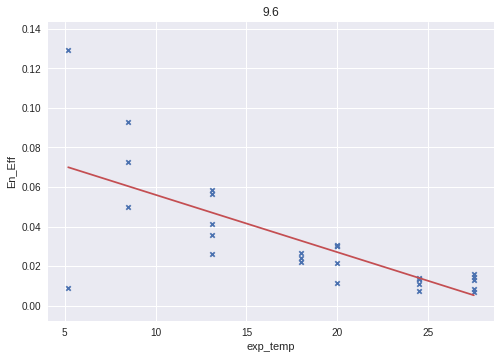

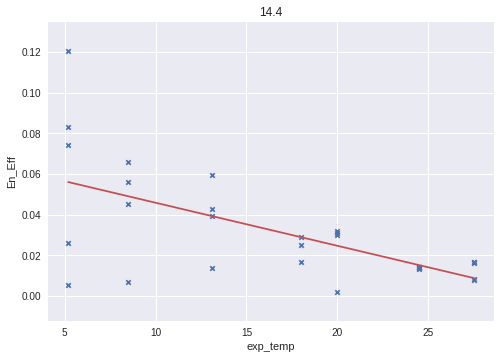

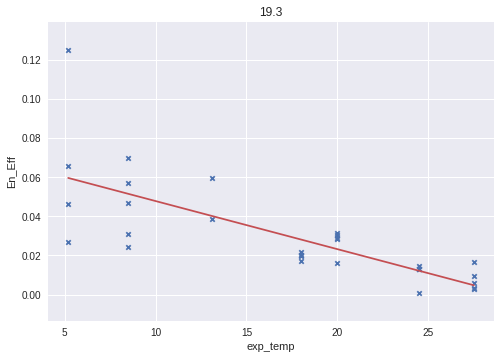

In [44]:
for name, group in grouped_feed:
    #print("Statsmodel.Formula.Api Method")
    modelgroup = smf.ols(formula='En_Eff ~ exp_temp', data=group).fit()
    y = modelgroup.params[0] + (modelgroup.params[1] * group.exp_temp)
    print("\n", modelgroup.summary())
    print("\n" ,modelgroup.params)
    print("\nStream Temp: ",name)
    print("\nThe aic of this model is: ", modelgroup.aic, "\nand the bic is: ", modelgroup.bic)
    group.plot.scatter(x = "exp_temp", y = "En_Eff", marker = "x", title = name)
    plt.plot(group.exp_temp, y, "r" )
    
plt.show()


# Saving dataframes for R

In [47]:

def stream_fact(row):
    if row["stream_temp"] == 9.6:
        val = "cold"
    elif row["stream_temp"] == 14.4:
        val = "tepid"
    else:
        val = "warm"
    return val



workingdf2["stream_temp_fact"] = workingdf2.apply(stream_fact, axis = 1)
workingdf2["stream_temp"]
workingdf2["stream_temp_fact"]

0      tepid
1      tepid
2      tepid
3      tepid
4      tepid
5      tepid
7      tepid
8      tepid
9      tepid
10     tepid
11     tepid
12     tepid
13     tepid
15     tepid
16     tepid
18     tepid
20     tepid
21     tepid
22     tepid
23     tepid
25     tepid
26     tepid
27     tepid
28     tepid
29     tepid
30     tepid
31     tepid
32     tepid
33     tepid
34     tepid
       ...  
68      warm
69      warm
71      cold
72      cold
76      cold
77      cold
78      cold
80      cold
81      cold
82      cold
83      cold
84      cold
85      cold
88      cold
89      cold
90      cold
91      cold
92      cold
93      cold
94      cold
95      cold
96      cold
97      cold
98      cold
99      cold
100     cold
101     cold
102     cold
103     cold
104     cold
Name: stream_temp_fact, Length: 89, dtype: object

In [48]:
new_df.to_csv("../Data/Respiration_data.csv")
workingdf2.to_csv("../Data/Feeding_data.csv")

In [ ]:
import subprocess
subprocess.Popen("/usr/lib/R/bin/Rscript --verbose TestR.R > \
../Results/TestR.Rout 2> ../Results/TestR_errFile.Rout",\
shell=True).wait()

In [ ]:
workingdf2

In [ ]:
E = 0.8
K = k
x = 5
Th = 303
B0 = 3.23


In [ ]:
exp1 = ((-E)/K) * (1/x - 1/283.15)

In [ ]:
exp2 = (Eh/K) * (1/Th - 1/x)
   
model = (B0 * np.exp(exp1))/(1 + np.exp(exp2))

In [ ]:
new_df